In [1]:
import json

# Text Analysis

Today we covered a broad range of techniques for analyzing unstructured text. Yesterday, the group exercise was designed to help you get to know each other better and explore possible topics for a group research project that you might launch during the second week by designing a study that would employ digital trace data. Today, we are going to have a more structured group exercise designed to compare the strengths and weaknesses of different text analysis techniques when they are applied to the same dataset.

<ol>
    <li>Divide yourselves into groups of four by counting off in order around the room.</li>
    <li>Load the dataframe of tweets by President Trump that we analyzed during the discussion of dictionary-based text methods:</li>
</ol>

In [2]:
with open("trump_tweets.json") as file:
    trump_tweets = json.load(file)

print("Contains {0} tweets. The first one was liked {1} times and retweeted {2} times.".format(
    len(trump_tweets), trump_tweets[0]["favorite_count"], trump_tweets[0]["retweet_count"]))

Contains 3196 tweets. The first one was liked 4550 times and retweeted 1114 times.


<ol start=3>
<li>Use at least two of the techniques we discussed this morning to pull out features from the text of Trump’s tweets (e.g. dictionaries, sentiment, stemming).</li>

<li>Work together to identify whether any features of Trump’s Twitter language predict the number of retweets or likes his messages receive.</li>

<li>Load the dataframe of daily approval ratings for President Trump from the FiveThirtyEight's projects page:</li>
</ol>

In [3]:
import pandas as pd
trump_approval = pd.read_csv("https://projects.fivethirtyeight.com/trump-approval-data/approval_topline.csv")

In [4]:
trump_approval.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,8/8/2018,42.95343,47.21862,38.68825,52.48418,56.22020,48.74815,10:54:10 8 Aug 2018
1,Donald Trump,Adults,8/8/2018,40.90865,44.43031,37.38699,52.60241,56.38459,48.82022,10:53:53 8 Aug 2018
2,Donald Trump,All polls,8/8/2018,41.35808,45.80646,36.90971,52.72659,56.52852,48.92466,10:53:37 8 Aug 2018
3,Donald Trump,Adults,8/7/2018,40.90865,44.43031,37.38699,52.60241,56.38459,48.82022,19:00:56 7 Aug 2018
4,Donald Trump,Voters,8/7/2018,43.14393,47.50979,38.77807,52.44352,56.27042,48.61662,19:01:12 7 Aug 2018


<ol start=6>
<li>Work together to determine whether there are any features of Trump’s Twitter language that have an association with his overall approval ratings.</li>

<li>Produce a visualization that describes the findings of your analysis. (See the code below to help you get started.)</li>
</ol>

Unlike yesterday, your group will be asked to share this visualization with the rest of your Institute in the 15 minutes before the visiting speaker’s lecture. Please email a copy of your presentation to the organizer of your institute so that it can be displayed on a large screen.

## Text processing and dictionary based approaches

The Natural Language Toolkit ([NLTK](https://www.nltk.org)), can be used to help with much of the text processing that you will want to do on this data. Below we'll demonstrate the utility of the NLTK.

In [5]:
#!pip3 install nltk
import nltk

### Word counts and stopwords

First, let's just [tokenize](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) the text into words (separated by whitespace) and visualize the most frequent words across all of Donald Trump's tweets. For example, this is what tokenization returns for a single tweet:

In [6]:
print(nltk.word_tokenize(trump_tweets[0]['text']))

['Just', 'met', 'with', 'UN', 'Secretary-General', 'António', 'Guterres', 'who', 'is', 'working', 'hard', 'to', '“', 'Make', 'the', 'United', 'Nations', 'Great', 'Again.', '”', 'When', 'the', 'UN', 'does', 'more', 'to', 'solve', 'conflicts', 'around', 'the', 'world', ',', 'it', 'means', 'the', 'U.S.', 'has', 'less', 'to', 'do', 'and', 'we', 'save', 'money', '.', '@', 'NikkiHaley', 'is', 'doing', 'a', 'fantastic', 'job', '!', 'https', ':', '//t.co/pqUv6cyH2z']


Let's tokenize all of the tweets:

In [7]:
tokens = []
for tweet in trump_tweets:
    tokens.extend(nltk.word_tokenize(tweet['text']))

In [8]:
print("Trump's {0} tweets contains {1} unique tokens".format(len(trump_tweets), len(set(tokens))))

Trump's 3196 tweets contains 10929 unique tokens


The twenty most frequent words with their counts are: ['http', 'co', 'great', 'amp', 'rt', 'peopl', 'news', 'job', 'presid', 'thank', 'countri', 'tax', 'year', 'fake', 'trump', 'america', 'today', 'american', 'big', 'u']


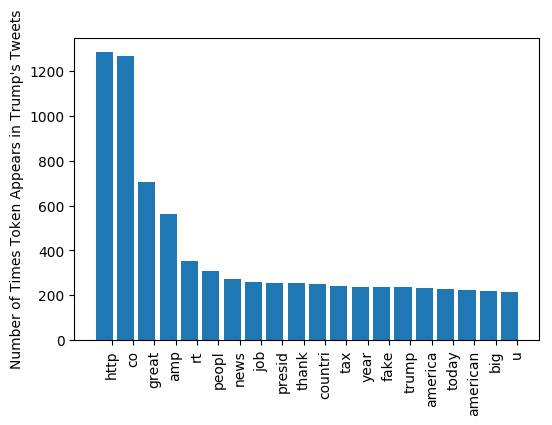

In [21]:
# stackoverflow.com/questions/35596128/how-to-generate-a-word-frequency-histogram-where-bars-are-ordered-according-to
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generate_bar_chart(tokens, limit):
    plt.figure(figsize=(6, 4), dpi = 100)
    counts = Counter(tokens)
    labels, values = zip(*counts.items())

    # Sort your tokens in descending order
    indSort = np.argsort(values)[::-1][:limit]

    # Arrange the labels and values of this data in the same (descending) order
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    print("The twenty most frequent words with their counts are: {0}".format(list(labels)))

    indexes = np.arange(len(labels))
    bar_width = 0.35
    plt.bar(indexes, values) # Plot the bars

    # Add labels
    plt.xticks(indexes + bar_width, labels)
    plt.xticks(rotation=90)
    plt.ylabel("Number of Times Token Appears in Trump's Tweets")
    
    plt.show()

generate_bar_chart(tokens, 20)

As you can see above, without removing punctuation, lowercasing, [stemming or lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html), or removing [stop words](https://en.wikipedia.org/wiki/Stop_words), the analysis may yield relatively uninformative results.* (There is a big caveat here depending on what is 'informative' to your use case.) Let's now do both. For example, stemming the same tweet above, yields the following:

In [10]:
from nltk.corpus import stopwords
print([word for word in nltk.word_tokenize(trump_tweets[0]['text']) if word not in stopwords.words('english')])

['Just', 'met', 'UN', 'Secretary-General', 'António', 'Guterres', 'working', 'hard', '“', 'Make', 'United', 'Nations', 'Great', 'Again.', '”', 'When', 'UN', 'solve', 'conflicts', 'around', 'world', ',', 'means', 'U.S.', 'less', 'save', 'money', '.', '@', 'NikkiHaley', 'fantastic', 'job', '!', 'https', ':', '//t.co/pqUv6cyH2z']


In [11]:
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
ps = PorterStemmer()

tokens = []
for tweet in trump_tweets:
    # First, let's lowercase the tweet text
    tweet_text = tweet['text'].lower()
    
    # Next, let's just tokenize on whitespace. This will drop any punctuation.
    tokenizer = RegexpTokenizer(r'\w+')
    tweet_words = tokenizer.tokenize(tweet_text)
    
    # Then, remove stop words from the tweet
    filtered_tweet = [word for word in tweet_words if word not in stopwords.words('english')]
    
    # Lastly, stem the remaining words
    tokens.extend([ps.stem(word) for word in filtered_tweet])

Notice how the number of unique tokens has decreased from roughly 10k to 6.5k! And the bar chart below suggests some of the more obvious words (e.g. 'america', 'great' 'fake', 'job').

In [12]:
print("Trump's {0} tweets contains {1} unique tokens".format(len(trump_tweets), len(set(tokens))))

Trump's 3196 tweets contains 6476 unique tokens


The twenty most frequent words with their counts are: ['http', 'co', 'great', 'amp', 'rt', 'peopl', 'news', 'job', 'presid', 'thank', 'countri', 'tax', 'year', 'fake', 'trump', 'america', 'today', 'american', 'big', 'u']


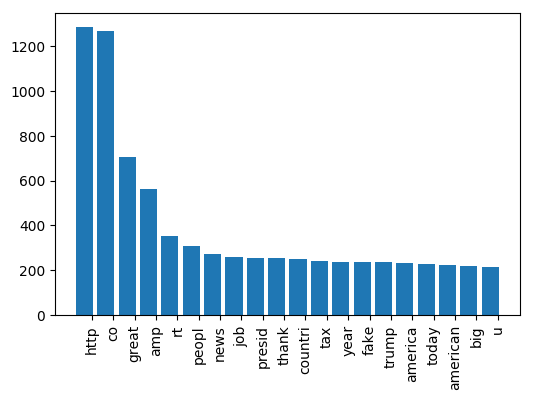

In [13]:
generate_bar_chart(tokens, 20)

### Tf-idf

Term frequency-inverse document frequency ([tf-idf](https://en.wikipedia.org/wiki/Tf–idf)) is a measure used to count upweight words which occur in fewer documents. Let's try it on all of Trump's tweets, so you can see what we mean. To do so, we'll use another very common Python package called [scikit-learn](http://scikit-learn.org/stable/).

In [32]:
# !pip3 install sklearn

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=True, stop_words='english', analyzer=ps.stem)
X_train_counts = count_vect.fit_transform([tweet['text'] for tweet in trump_tweets])

from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

### Creating dictionaries 

Say you wanted to know how many tweets mentioned topics related to the economy. For example, of Trump's tweets, how many mentioned the keywords: 'economy', 'unemployment', 'trade', or 'tariff'. You could subset these tweets as so:

In [38]:
economic_dictionary = ['economy', 'unemployment', 'trade', 'tariff']

economic_tweets = []
for tweet in trump_tweets:
    tweet_text = tweet['text'].lower()
    if any([tweet_text.count(economy) for economy in economic_dictionary]):
        economic_tweets.append(tweet)

print("Out of {0} total tweets, {1} ({2}%) mentioned the economy in some form.".format(
    len(trump_tweets), len(economic_tweets), 100.0*(len(economic_tweets))/len(trump_tweets)))

Out of 3196 total tweets, 165 (5.16270337922403%) mentioned the economy in some form.


To get a sense of these 'economic' tweets, let's look a few of them:

In [40]:
[tweet['text'] for tweet in economic_tweets[:5]]

['Great talk with my friend President Mauricio Macri of Argentina this week. He is doing such a good job for Argentina. I support his vision for transforming his country’s economy and unleashing its potential!',
 'Talking trade with the Vice Premier of the People’s Republic of China, Liu He. https://t.co/9T7Iq6F3Xe',
 'The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China...',
 'Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!',
 'ZTE, the large Chinese phone company, buys a big percentage of individual parts from U.S. companies. This is also reflective of the larger trade deal we are negotiating with China and my personal relationship with President Xi.']

### Sentiment analysis & LIWC

In [35]:
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()

/usr/local/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Aggregate measures by day & compare with approval

## (Optional) Rehydrate tweets

For the activity above, we have provided you the context for entire tweets (tweet ids, text, hashtags, likes, retweets, etc). The better way to get up to date data about these tweets is to request them as you need them. This more nicely handles tweets that have been deleted. Below we show you how you would get those tweets if you were just given tweet ids.

In [14]:
# This is a different package for importing data from Twitter (like `tweepy`) called `twitter`
# !pip3 install python-twitter
import twitter 

In [15]:
# Plug in your own API keys. Do not share your keys with others.
api = twitter.Api(consumer_key='<consumer_key>',
                  consumer_secret='<consumer_secret>',
                  access_token_key='<access_token_key>',
                  access_token_secret='<access_token_secret>')

In [16]:
def chunks(l, n):
    # stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [17]:
ids = pd.read_csv('trump_ids.csv') # Read in the CSV of tweet status IDs

In [18]:
tweets = []
for chunk in chunks(list(ids), 100):
    _statuses = api.GetStatuses(chunk)
    _statuses = [t.AsDict() for t in _statuses]
    tweets += _statuses

In [19]:
tweets[0]

{'created_at': 'Fri May 18 20:41:21 +0000 2018',
 'favorite_count': 51906,
 'hashtags': [],
 'id': 997577906007298048,
 'id_str': '997577906007298048',
 'lang': 'en',
 'retweet_count': 10778,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': 'Just met with UN Secretary-General António Guterres who is working hard to “Make the United Nations Great Again.” W… https://t.co/B6dQMsJl1d',
 'truncated': True,
 'urls': [{'expanded_url': 'https://twitter.com/i/web/status/997577906007298048',
   'url': 'https://t.co/B6dQMsJl1d'}],
 'user': {'created_at': 'Wed Mar 18 13:46:38 +0000 2009',
  'description': '45th President of the United States of America🇺🇸',
  'favourites_count': 25,
  'followers_count': 53585130,
  'friends_count': 47,
  'geo_enabled': True,
  'id': 25073877,
  'id_str': '25073877',
  'lang': 'en',
  'listed_count': 91762,
  'location': 'Washington, DC',
  'name': 'Donald J. Trump',
  'profile_background_color': '6D5C18',
  '